<a href="https://colab.research.google.com/github/saha-indranil/ml-projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
%matplotlib inline
!pip install -q gradio               # installing gradio

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import gradio as gr

import tensorflow as tf
from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Flatten, Softmax # Types of layers to be used in our model


In [100]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


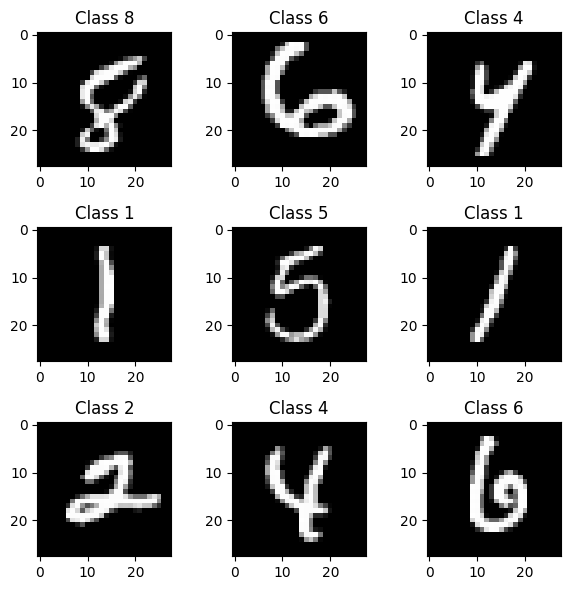

In [101]:
plt.rcParams['figure.figsize'] = (6,6) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [102]:
# just a little function for pretty printing a matrix
# we can ignore it if we want
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(X_train[num])

0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0  113  253  214   10    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0  193  252  253   91    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0   21  254  253  183    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0  183  253  252   61    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0  203  254  151    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   21  223  253  151    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0

In [103]:
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [104]:
model = Sequential([
    Flatten(input_shape=(28, 28), name="L0"),
    Dense(200, activation='relu', name="L1"),
    Dense(80, activation='relu', name="L2"),
    Dense(10, activation='linear', name="L3")
])

In [105]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L0 (Flatten)                (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 200)               157000    
                                                                 
 L2 (Dense)                  (None, 80)                16080     
                                                                 
 L3 (Dense)                  (None, 10)                810       
                                                                 
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(X_train,y_train, batch_size=128, epochs=12, verbose=1)

Epoch 1/12
469/469 [==============================] - 6s 9ms/step - loss: 0.2918 - accuracy: 0.9166
Epoch 2/12
469/469 [==============================] - 7s 15ms/step - loss: 0.1150 - accuracy: 0.9654
Epoch 3/12
469/469 [==============================] - 8s 17ms/step - loss: 0.0784 - accuracy: 0.9769
Epoch 4/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0567 - accuracy: 0.9824
Epoch 5/12
469/469 [==============================] - 8s 17ms/step - loss: 0.0446 - accuracy: 0.9865
Epoch 6/12
469/469 [==============================] - 7s 15ms/step - loss: 0.0337 - accuracy: 0.9897
Epoch 7/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0255 - accuracy: 0.9922
Epoch 8/12
469/469 [==============================] - 7s 15ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 9/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 10/12
469/469 [==============================] - 7s 14ms/step - loss: 0.0156 - accurac

In [107]:
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")


313/313 [==============================] - 2s 6ms/step - loss: 0.0860 - accuracy: 0.9777
Test loss: 0.08601538091897964
Test accuracy: 0.9776999950408936


In [108]:
model = Sequential([model, Softmax()])

In [109]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 4ms/step


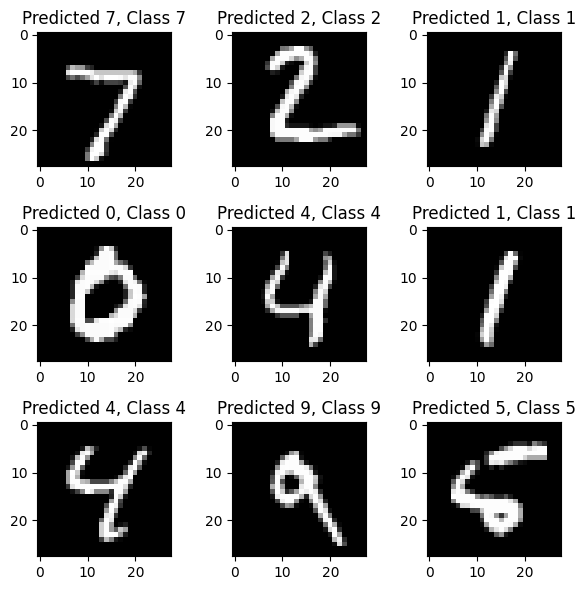

In [110]:
# Printing right predictions

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

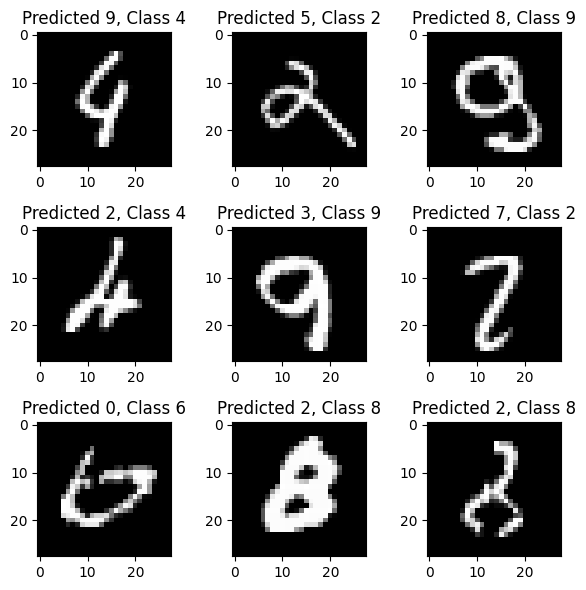

In [111]:
# Printing wrong predictions

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

In [114]:
# deploying my model on gradio

def classify(image):
  image = image.reshape(1,784) / 255.0
  prediction = model.predict(image).tolist()[0]
  return {str(i): (prediction[i]) for i in range(10)}

label = gr.outputs.Label(num_top_classes=3)

demo = gr.Interface(fn = classify,
                    inputs= "sketchpad",
                    outputs= label,
                    live=True,
                    title="Digit Recognition on MNIST dataset",
                    description="Draw a number 0 through 9 on the sketchpad, and see predictions in real time.",
                   )

demo.launch(debug= True, share= True)

<ipython-input-114-cb35527e6cb4>:8: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=3)
<ipython-input-114-cb35527e6cb4>:8: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3e052234af0cd3bbae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 32ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 706, in wrapper
    response = f(*args, **kwargs)
  Fi

1/1 [==============================] - 0s 35ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://3e052234af0cd3bbae.gradio.live
